# 决策树

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
X = X[:,2:]
y = iris.target

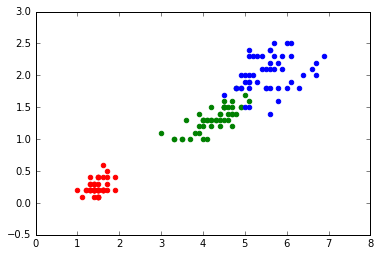

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='g')
plt.scatter(X[y==2, 0], X[y==2, 1], color='b')

In [4]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [5]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[1]-axis[0])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


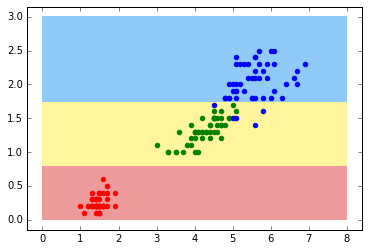

In [6]:
plot_decision_boundary(dt_clf, axis=[0, 8, 0, 3])
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='g')
plt.scatter(X[y==2, 0], X[y==2, 1], color='b')

## 信息熵

In [7]:
def entropy(p):
    return -p * np.log(p) - (1-p) * np.log(1-p)

In [8]:
x = np.linspace(0.01, 0.99, 200)

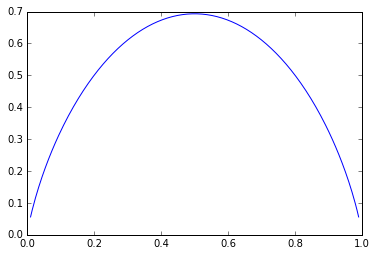

In [9]:
plt.plot(x, entropy(x))

## 模拟使用信息熵进行划分

In [6]:
def split(X, y, d, value):
    index_a = (X[:, d] <= value)
    index_b = (X[:,d] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b]

In [9]:
import numpy as np
from collections import Counter
from math import log

def entropy(y):
    counter = Counter(y)
    res = 0.0
    for num in counter.values():
        p = num / len(y)
        res += -p * log(p)
    return res


def try_split(X, y):
    best_entropy = float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
        for i in range(1, len(X)):
            if X[sorted_index[i-1], d] != X[sorted_index[i], d]:
                v = (X[sorted_index[i-1], d] + X[sorted_index[i], d]) / 2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                e = entropy(y_l) + entropy(y_r)
                if e < best_entropy:
                    best_entropy, best_d, best_v =e, d, v
    return best_entropy, best_d, best_v

In [11]:
best_entropy, best_d, best_v = try_split(X, y)
print('best_entropy =', best_entropy)
print('best_d =', best_d)
print('best_v =', best_v)

best_entropy = 0.6931471805599453
best_d = 0
best_v = 2.45


In [12]:
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)

In [13]:
entropy(y1_l)

0.0

In [14]:
entropy(y1_r)

0.6931471805599453

In [15]:
best_entropy2, best_d2, best_v2 = try_split(X1_r, y1_r)
print('best_entropy2 =', best_entropy2)
print('best_d2 =', best_d2)
print('best_v2 =', best_v2)

best_entropy2 = 0.4132278899361904
best_d2 = 1
best_v2 = 1.75


In [16]:
X2_l, X2_r, y2_l, y2_r = split(X1_r, y1_r, best_d2, best_v2)

In [18]:
entropy(y2_l)

0.30849545083110386

In [19]:
entropy(y2_r)

0.10473243910508653

## 基尼系数

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion='gini')
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


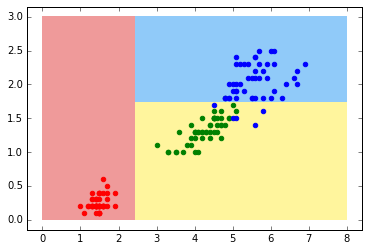

In [21]:
plot_decision_boundary(dt_clf, axis=[0, 8, 0, 3])
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='g')
plt.scatter(X[y==2, 0], X[y==2, 1], color='b')

In [23]:
def split(X, y, d, value):
    index_a = (X[:, d] <= value)
    index_b = (X[:,d] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b]

import numpy as np
from collections import Counter
from math import log

def gini(y):
    counter = Counter(y)
    res = 1.0
    for num in counter.values():
        p = num / len(y)
        res -= p ** 2
    return res


def try_split(X, y):
    best_g = float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
        for i in range(1, len(X)):
            if X[sorted_index[i-1], d] != X[sorted_index[i], d]:
                v = (X[sorted_index[i-1], d] + X[sorted_index[i], d]) / 2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                e = gini(y_l) + gini(y_r)
                if e < best_g:
                    best_g, best_d, best_v =e, d, v
    return best_g, best_d, best_v

In [28]:
best_g, best_d, best_v = try_split(X, y)
print('best_g =', best_entropy)
print('best_d =', best_d)
print('best_v =', best_v)

best_g = 0.6931471805599453
best_d = 0
best_v = 2.45


In [25]:
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)

In [26]:
gini(y1_l)

0.0

In [27]:
gini(y1_r)

0.5

## CART 和 决策树的超参数

In [29]:
from sklearn import datasets

X, y = datasets.make_moons(noise=0.25, random_state=666)

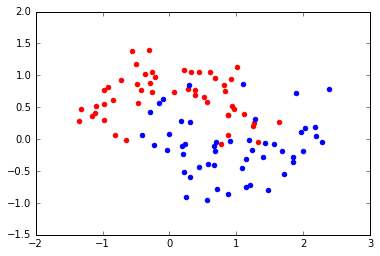

In [30]:
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='b')

In [31]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


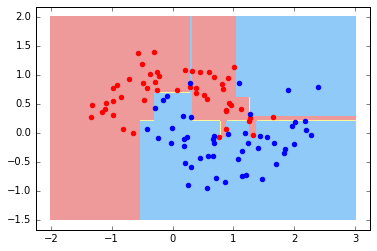

In [32]:
plot_decision_boundary(dt_clf, axis=[-2, 3, -1.5, 2])
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='b')

C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


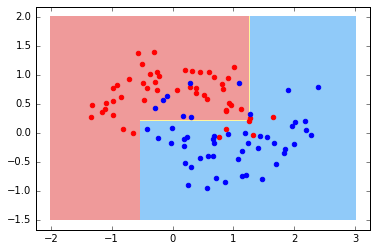

In [33]:
#上图结果出现了过拟合

dt_clf2 = DecisionTreeClassifier(max_depth=2)
dt_clf2.fit(X, y)
plot_decision_boundary(dt_clf2, axis=[-2, 3, -1.5, 2])
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='b')

C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


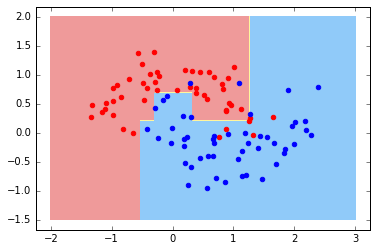

In [34]:
dt_clf3 = DecisionTreeClassifier(min_samples_split=10)#一个节点最少要有10个样本才进行下一步划分
dt_clf3.fit(X, y)
plot_decision_boundary(dt_clf3, axis=[-2, 3, -1.5, 2])
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='b')

C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


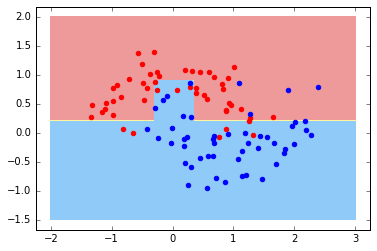

In [35]:
dt_clf4 = DecisionTreeClassifier(min_samples_leaf=6)#一个叶子节点最少要有6个样本
dt_clf4.fit(X, y)
plot_decision_boundary(dt_clf4, axis=[-2, 3, -1.5, 2])
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='b')

C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


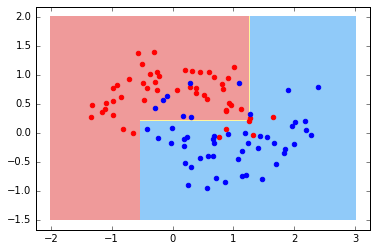

In [39]:
dt_clf5 = DecisionTreeClassifier(max_leaf_nodes=4)#最多有4个叶子结点
dt_clf5.fit(X, y)
plot_decision_boundary(dt_clf5, axis=[-2, 3, -1.5, 2])
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='b')